In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:/Users/manep/OneDrive/Desktop/TP/Stock/nifty_2019_2025_cleaned.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values('date')

print(f'{df.head()}\n')
print(f'{df.describe()}\n')
print(f'{df.info()}\n')

        date      open      high       low     close     volume  turnover
0 2019-01-01  10881.70  10923.60  10807.10  10910.10  159404542   8688.26
1 2019-01-02  10868.85  10895.35  10735.05  10792.50  309665939  15352.25
2 2019-01-03  10796.80  10814.05  10661.25  10672.25  286241745  15030.45
3 2019-01-04  10699.70  10741.05  10628.65  10727.35  296596655  14516.74
4 2019-01-07  10804.85  10835.95  10750.15  10771.80  269371080  12731.29

                                date          open          high  \
count                           1710   1710.000000   1710.000000   
mean   2022-06-13 07:39:47.368420864  17426.026959  17507.662135   
min              2019-01-01 00:00:00   7735.150000   8036.950000   
25%              2020-09-22 06:00:00  12146.587500  12170.275000   
50%              2022-06-13 12:00:00  17447.175000  17562.075000   
75%              2024-02-29 18:00:00  22026.037500  22131.562500   
max              2025-11-24 00:00:00  26248.250000  26277.350000   
std        

This dataset appears to contain Nifty stock market data from 2019 to 2025. Here's a breakdown:

**Key Observations:**

*   **Date Range:** The data spans from January 1, 2019, to November 24, 2025.
*   **Number of Entries:** There are 1710 entries (rows) in the dataset.
*   **Columns:**
    *   `date`: A datetime column indicating the date of the trading day.
    *   `open`, `high`, `low`, `close`: These are float64 columns representing the opening, highest, lowest, and closing prices of the Nifty index for each day.
    *   `volume`: An integer64 column representing the trading volume for the day.
    *   `turnover`: A float64 column representing the turnover (total value of trades) for the day.

**Descriptive Statistics Summary:**

*   **Prices (`open`, `high`, `low`, `close`):**
    *   The Nifty index has ranged significantly, with the lowest `close` price around 7610 and the highest around 26216.05. This indicates a strong upward trend over the period.
    *   The standard deviations are quite large (around 4900), suggesting high volatility in prices over this period.
*   **`volume`:**
    *   The average daily trading volume is around 394 million, with a minimum of 19 million and a maximum of 1.8 billion. This large range suggests varying levels of market activity.
*   **`turnover`:**
    *   The average daily turnover is approximately 26433 crores (assuming the unit is crores, often used for turnover in India). It ranges from 1572 crores to 93786 crores, also indicating high variability in the value of trades.

**Data Quality:**

*   All columns (`date`, `open`, `high`, `low`, `close`, `volume`, `turnover`) have 1710 non-null entries, meaning there are no missing values in this dataset. This is excellent for analysis.

In summary, this dataset provides a comprehensive daily record of Nifty's performance, including price movements, trading volume, and turnover, over a period of almost seven years. It's clean and ready for further time-series analysis, trend identification, and potentially forecasting.

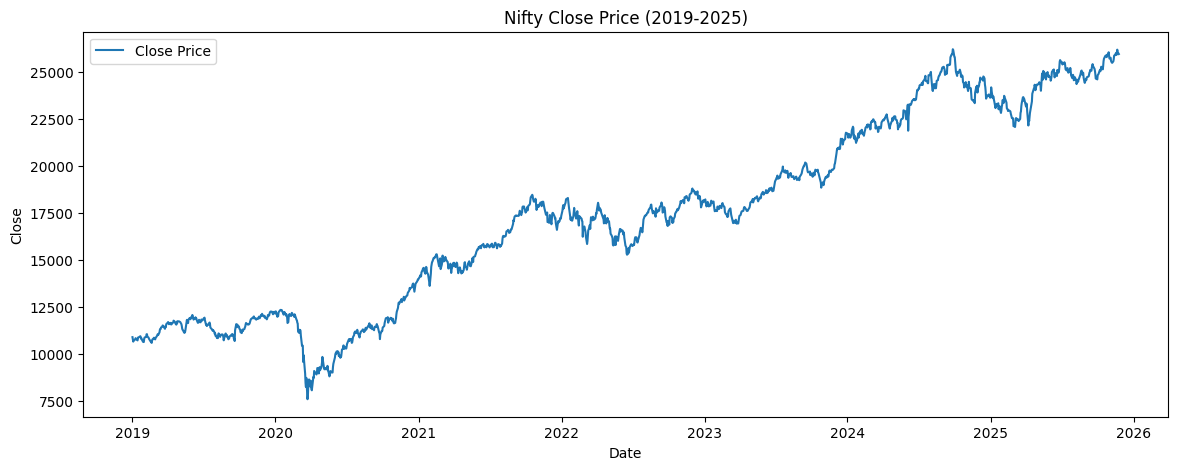

In [6]:
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['close'], label ="Close Price")
plt.title("Nifty Close Price (2019-2025)")
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


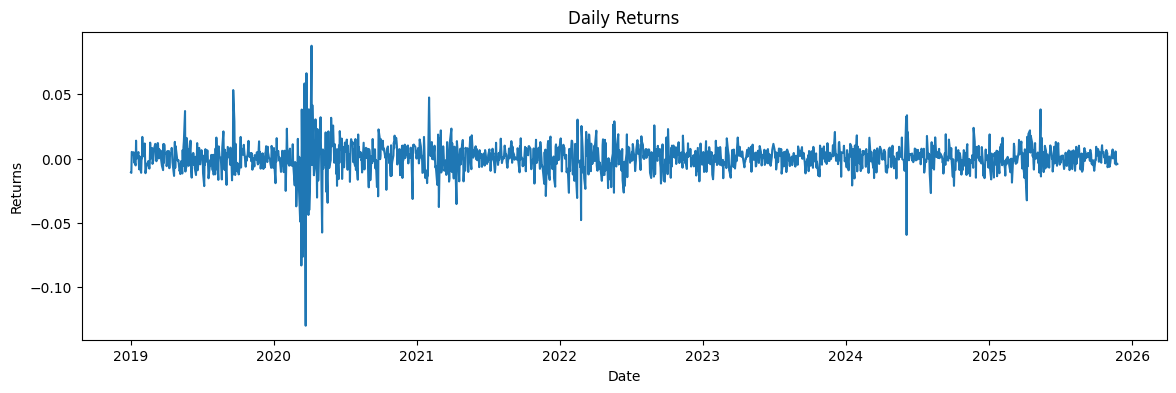

In [7]:
df['returns'] = df['close'].pct_change()
plt.figure(figsize=(14,4))
plt.plot(df['date'], df['returns'])
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()


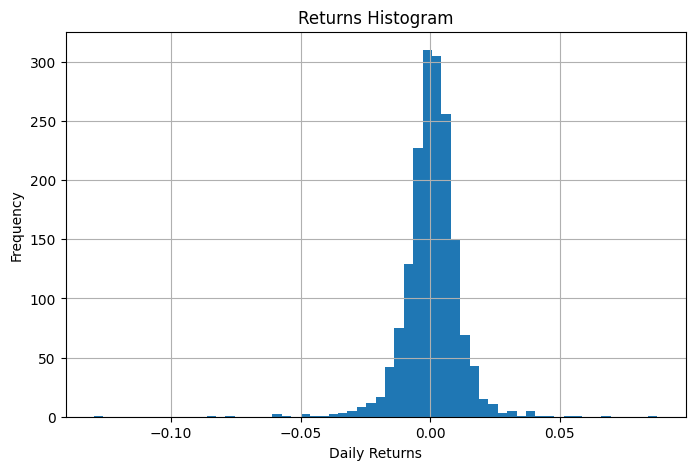

In [8]:
plt.figure(figsize=(8,5))
df['returns'].dropna().hist(bins=60)
plt.title("Returns Histogram")
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

### Analysis of Daily Returns Graph

The **Daily Returns** graph (generated by plotting `df['date']` against `df['returns']`) visualizes the percentage change in the Nifty's closing price from one day to the next over the entire period (2019-2025).

**What to look for:**

*   **Volatility:** Spikes upwards or downwards indicate significant daily gains or losses, respectively. Periods with many such spikes suggest higher market volatility, while flatter periods indicate relative calm.
*   **Clustering:** You might observe periods where large positive or negative returns tend to cluster together, followed by periods of smaller fluctuations. This phenomenon is known as 'volatility clustering' and is common in financial markets.
*   **Trends:** While daily returns fluctuate around zero, a sustained upward drift in the baseline of returns (even if small) would correspond to the overall upward trend observed in the Nifty's close price over the years.

### Analysis of Returns Histogram

The **Returns Histogram** (generated from `df['returns'].dropna().hist()`) shows the distribution of these daily percentage changes.

**What to look for:**

*   **Central Tendency:** The peak of the histogram will indicate the most frequent daily return. For a growing index like the Nifty, this peak is often slightly positive or very close to zero.
*   **Shape and Skewness:** Ideal financial returns are often modeled as normally distributed (bell-shaped). However, real-world stock returns typically exhibit:
    *   **Fat Tails (Leptokurtosis):** More frequent extreme positive and negative returns than a normal distribution would predict. This means large market movements (crashes or booms) are more common than a simple normal distribution would suggest.
    *   **Skewness:** The distribution might be slightly skewed. A negative skew means more frequent small gains and a few large losses, while a positive skew means more frequent small losses and a few large gains.
*   **Range:** The spread of the histogram indicates the overall range of daily returns observed, giving a sense of the market's maximum daily gains and losses during the period.

In [10]:
import pandas as pd
import numpy as np

INPUT = 'C:/Users/manep/OneDrive/Desktop/TP/Stock/nifty_2019_2025_cleaned.csv'
OUTPUT = 'C:/Users/manep/OneDrive/Desktop/TP/Stock/Output/nifty_withFeatures.csv'

df = pd.read_csv(INPUT,parse_dates=['date'])
df = df.sort_values('date').reset_index(drop=True)

#Basic returns
df['ret_1'] = df['close'].pct_change(1)
df['ret_2'] = df['close'].pct_change(2)
df['ret_3'] = df['close'].pct_change(3)

#Simple moving averages

df['sma_5'] = df['close'].rolling(5).mean()
df['sma_10'] = df['close'].rolling(10).mean()
df['sma_20'] = df['close'].rolling(20).mean()

#Eponential moving averages
df['ema_12'] = df['close'].ewm(span=12,adjust=False).mean()
df['ema_26'] = df['close'].ewm(span=26, adjust = False).mean()

#Volatility (rolling std of returns)

df['vol_10'] = df['ret_1'].rolling(10).std()
df['vol_20'] = df['ret_1'].rolling(20).std()

#res 14
def compute_rsi(series, length=14):
  delta = series.diff()
  up = delta.clip(lower=0.0)
  down = -1*delta.clip(upper =0.0)
  ma_up = up.rolling(window = length, min_periods = length).mean()
  ma_down = down.rolling(window = length, min_periods = length).mean()
  rs = ma_up/ma_down
  rsi = 100 - (100 / (1+rs))
  return rsi

df['rsi_14'] = compute_rsi(df['close'], length=14)

#MACD
ema_fast = df['close'].ewm(span=12,adjust = False).mean()
ema_slow = df['close'].ewm(span = 26, adjust = False).mean()
df['macd'] = ema_fast - ema_slow
df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()
df['macd_hist'] = df['macd'] - df['macd_signal']


#Bollinger bands
ma20 = df['close'].rolling(window=20).mean()
std20 = df['close'].rolling(window=20).std()
df['bb_upper'] = ma20 + 2*std20
df['bb_lower'] = ma20 - 2*std20
df['bb_width'] = (df['bb_upper'] - df['bb_lower'])/ ma20

if "volume" in df.columns:
  df['vol_change_1'] = df['volume'].pct_change(1)
  df['vol_mean_10'] = df['volume'].rolling(10).mean()


for lag in [1,2,3,5,10]:
  df[f'close_lag{lag}'] = df['close'].shift(lag)
  df[f'ret_lag_{lag}'] = df['ret_1'].shift(lag)


df_features = df.dropna().reset_index(drop = True)

df_features.to_csv(OUTPUT, index=False)
print("Feature generated and saved to :", OUTPUT)
print("Rows :", len(df_features), 'Date Range:', df_features['date'].min(), "to", df_features['date'].max())

Feature generated and saved to : C:/Users/manep/OneDrive/Desktop/TP/Stock/Output/nifty_withFeatures.csv
Rows : 1690 Date Range: 01-04-2024 to 31-12-2024


The code `df['sma_5'] = df['close'].rolling(5).mean()`, `df['sma_10'] = df['close'].rolling(10).mean()`, and `df['sma_20'] = df['close'].rolling(20).mean()` calculates Simple Moving Averages (SMAs) of the 'close' price over different time windows.

*   **Simple Moving Average (SMA):** An SMA is a technical analysis indicator that calculates the average of a security's price over a specified number of periods. It helps to smooth out price data by creating a constantly updated average price.

*   **`df['close'].rolling(window).mean()`:**
    *   `rolling(window)`: This function creates a 'rolling window' object. The `window` parameter specifies the number of observations (days in this case) to include in each window.
    *   `.mean()`: This calculates the mean (average) of the values within each rolling window.

Here's what each line specifically does:

*   **`df['sma_5'] = df['close'].rolling(5).mean()`:** This calculates the **5-day Simple Moving Average**. For each day, it takes the average of the current day's closing price and the closing prices of the previous 4 days. This gives a relatively short-term view of the average price.

*   **`df['sma_10'] = df['close'].rolling(10).mean()`:** This calculates the **10-day Simple Moving Average**. It averages the closing prices over the current day and the previous 9 days. This provides a medium-term average.

*   **`df['sma_20'] = df['close'].rolling(20).mean()`:** This calculates the **20-day Simple Moving Average**. It averages the closing prices over the current day and the previous 19 days. This typically represents a slightly longer-term average, often used for identifying trends.

These SMAs are commonly used in financial analysis to:
*   **Identify trends:** When the price is above its SMA, it suggests an uptrend, and vice versa.
*   **Generate buy/sell signals:** Crossovers between different SMAs (e.g., a 5-day SMA crossing above a 20-day SMA) can indicate potential changes in momentum.
*   **Smooth out price fluctuations:** They help in visualizing the underlying trend by removing short-term noise from the price data.

The code `df['ret_1'] = df['close'].pct_change(1)`, `df['ret_2'] = df['close'].pct_change(2)`, and `df['ret_3'] = df['close'].pct_change(3)` calculates percentage changes (returns) of the 'close' price over different periods and stores them in new columns:

*   **`df['close'].pct_change(1)`**: This calculates the **daily percentage change** of the 'close' price. For each day, it computes `(current_close_price - previous_day_close_price) / previous_day_close_price`. This is the most common way to calculate daily returns.
    *   The `1` in `pct_change(1)` indicates a period of 1. So, it's comparing the current value to the value from 1 period ago.

*   **`df['close'].pct_change(2)`**: This calculates the **2-day percentage change** of the 'close' price. For each day, it computes `(current_close_price - close_price_2_days_ago) / close_price_2_days_ago`. This tells you the return over a two-day window.
    *   The `2` in `pct_change(2)` indicates a period of 2.

*   **`df['close'].pct_change(3)`**: Similarly, this calculates the **3-day percentage change** of the 'close' price. It compares the current day's closing price to the closing price from 3 days ago.
    *   The `3` in `pct_change(3)` indicates a period of 3.

These new columns (`ret_1`, `ret_2`, `ret_3`) are often used in financial analysis to look at returns over different time horizons, which can be useful for trend analysis, volatility measurement, and feature engineering for predictive models.

In [13]:
df = pd.read_csv('C:/Users/manep/OneDrive/Desktop/TP/Stock/Output/nifty_withFeatures.csv')
df['date'] = pd.to_datetime(df['date'],format= '%d-%m-%Y')
df = df.sort_values('date')

df['target'] = (df['close'].shift(-1) > df['close'].astype(int))
df = df.dropna().reset_index(drop = True)

df.to_csv('C:/Users/manep/OneDrive/Desktop/TP/Stock/Output/nifty_final_for_model.csv',index = False)

print('Target Column created successfully')
print(df[['date', 'close', 'target']].head(10))


Target Column created successfully
        date     close  target
0 2019-01-02  10792.50   False
1 2019-01-03  10672.25    True
2 2019-01-04  10727.35    True
3 2019-01-07  10771.80    True
4 2019-01-08  10802.15    True
5 2019-01-09  10855.15   False
6 2019-01-10  10821.60   False
7 2019-01-11  10794.95   False
8 2019-01-14  10737.60    True
9 2019-01-15  10886.80    True


## Training , Testing

In [14]:
df = pd.read_csv('C:/Users/manep/OneDrive/Desktop/TP/Stock/Output/nifty_final_for_model.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

#train 2019 - 2022
train = df[df['date'] <= "2022-12-31"]

#validation
val = df[(df['date'] > "2022-12-31") & (df['date'] <= '2023-12-31')]

#test 2024-2025
test = df[(df['date'] > '2023-12-31')]

print('Train Rows', len(train))
print('Validation Rows', len(val))
print('Test Rows', len(test))

print('\ndate ranges:')
print('Train: ', train['date'].min(), "->", train['date'].max())
print('Val: ', val['date'].min(), "->", val['date'].max())
print('Test: ',test['date'].min(), "->", test['date'].max())



Train Rows 980
Validation Rows 244
Test Rows 466

date ranges:
Train:  2019-01-02 00:00:00 -> 2022-12-30 00:00:00
Val:  2023-01-02 00:00:00 -> 2023-12-29 00:00:00
Test:  2024-01-02 00:00:00 -> 2025-11-24 00:00:00


In [16]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 4.1 MB/s eta 0:00:18
   ---------------------------------------- 0.8/72.0 MB 2.2 MB/s eta 0:00:33
    --------------------------------------- 1.0/72.0 MB 1.8 MB/s eta 0:00:41
    --------------------------------------- 1.3/72.0 MB 1.6 MB/s eta 0:00:45
    --------------------------------------- 1.6/72.0 MB 1.5 MB/s eta 0:00:47
   - -------------------------------------- 1.8/72.0 MB 1.5 MB/s eta 0:00:49
   - -------------------------------------- 2.1/72.0 MB 1.4 MB/s eta 0:00:50
   - -------------------------------------- 2.4/72.0 MB 1.4 MB/s eta 0:00:50
   - -------------------------------------- 2.6/72.0 MB 1.4 MB/s eta 0:00:51
   - -------------------------------------- 2.9/72.0 MB 1.4 MB/s eta 0:00:51
   - -------

In [18]:
pip install joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install sklearn


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [21]:
from xgboost import XGBClassifier
import joblib
import os

df = pd.read_csv('C:/Users/manep/OneDrive/Desktop/TP/Stock/Output/nifty_final_for_model.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

train = df[df['date'] <= '2022-12-31']
val = df[(df['date'] > '2022-12-31') & (df['date'] <= '2023-12-31')]
test = df[df['date'] > '2023-12-31']

# Training

train = df[df['date'] <= '2022-12-31']
val = df[(df['date'] > '2022-12-31') & (df['date'] <= '2023-12-31')]
test = df[df['date'] > '2023-12-31']

features_cols = [
    'ret_1', 'ret_2', 'ret_3',
    'sma_5', 'sma_10', 'sma_20',
    'ema_12', 'ema_26',
    'vol_10', 'vol_20',
    'rsi_14',
    'macd', 'macd_signal', 'macd_hist',
    'bb_width',
    'vol_change_1', 'vol_mean_10',
    'close_lag1', 'close_lag2', 'close_lag3', 'close_lag5'
]

feature_cols = [f for f in features_cols if f in df.columns]

x_train = train[features_cols]
y_train = train['target']

x_val = val[features_cols]
y_val = val['target']

#Fill missing values

x_train = x_train.fillna(method='ffill').fillna(method='bfill')
x_val  = x_val.fillna(method='ffill').fillna(method='bfill')

model = XGBClassifier(
    n_estimators = 300,
    max_depth = 4,
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(x_train, y_train)
print('Model Training Complete')

# Save the trained model
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(model, os.path.join(model_dir, 'xgb_model.pkl'))
print(f'Model saved to {os.path.join(model_dir, 'xgb_model.pkl')}')

C:\Users\manep\AppData\Local\Temp\ipykernel_7836\1817838964.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_train = x_train.fillna(method='ffill').fillna(method='bfill')
C:\Users\manep\AppData\Local\Temp\ipykernel_7836\1817838964.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_val  = x_val.fillna(method='ffill').fillna(method='bfill')


ImportError: sklearn needs to be installed in order to use this module

Evaluating model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df= pd.read_csv('/content/drive/MyDrive/nifty_final_for_model.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

#Split

train= df[df['date'] <= '2022-12-31']
val= df[(df['date'] > '2022-12-31') & (df['date'] <= '2023-12-31')]
test = df[df['date'] > '2023-12-31']

features_cols = [
    'ret_1', 'ret_2', 'ret_3',
    'sma_5', 'sma_10', 'sma_20',
    'ema_12', 'ema_26',
    'vol_10', 'vol_20',
    'rsi_14',
    'macd', 'macd_signal', 'macd_hist',
    'bb_width',
    'vol_change_1', 'vol_mean_10',
    'close_lag1', 'close_lag2', 'close_lag3', 'close_lag5'
]

feature_cols = [f for f in feature_cols if f in df.columns]

x_val =val[features_cols].fillna(method='ffill').fillna(method='bfill')
y_val = val['target']

#prediction on validation data

val_preds = model.predict(x_val)

print('Validation accuracy: ', accuracy_score(y_val, val_preds))
print('Precision : ', precision_score(y_val, val_preds))
print('RecallL: ', recall_score(y_val, val_preds))
print('F1 Score: ', f1_score(y_val, val_preds))

print('\nConfusion Matrix')
print(confusion_matrix(y_val, val_preds))

In [ ]:
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/drive/MyDrive/nifty_final_for_model.csv", parse_dates=["date"])
df = df.sort_values('date').reset_index(drop=True)

train = df[df['date'] <= '2022-12-31']
val = df[(df['date'] > '2022-12-31') & (df['date'] <= '2023-12-31')]
test = df[df['date'] > '2023-12-31'].copy()

features_cols = [
    'ret_1', 'ret_2', 'ret_3',
    'sma_5', 'sma_10', 'sma_20',
    'ema_12', 'ema_26',
    'vol_10', 'vol_20',
    'rsi_14',
    'macd', 'macd_signal', 'macd_hist',
    'bb_width',
    'vol_change_1', 'vol_mean_10',
    'close_lag1', 'close_lag2', 'close_lag3', 'close_lag5'
]

features_cols = [f for f in features_cols if f in df.columns]
x_test = test[features_cols].fillna(method='ffill').fillna(method='bfill')

test['pred'] = model.predict(x_test)
test['signal'] = test['pred'].apply(lambda x:'BUY' if x==1 else 'SELL')

test['next_close'] = test['close'].shift(-1)
test['next_ret'] = (test['next_close']/test['close']) - 1

test['strategy_ret'] = test['pred']*test['next_ret']

test['buy_hold_ret'] = test['next_ret']
test = test.dropna().reset_index(drop=True)

test['cum_strategy'] = (1+test['strategy_ret']).cumprod()
test['cum_buy_hold'] = (1+test['buy_hold_ret']).cumprod()

plt.figure(figsize = (12,6))
plt.plot(test['date'], test['cum_strategy'], label='Strategy')
plt.plot(test['date'], test['cum_buy_hold'], label = "Buy & Hold")
plt.title("Cummulative Returns (Strategy vs Buy & Hold)")
plt.xlabel("Date")
plt.ylabel("Growth of 1 unit")
plt.legend()
plt.grid(True)
plt.show()

print("Total Strategy Return :", test['cum_strategy'].iloc[-1]-1)
print('Total  Buy & Hold Returns: ', test['cum_buy_hold'].iloc[-1] -1)
print('Number of Buy trades :', test['pred'].sum())
print('Win rate :', (test.loc[test['pred'] == 1, 'next_ret'] > 0).mean())

In [ ]:
!pip install mplfinance

In [ ]:
# Hybrid ML + TA strategy (Step E) + candlestick plot with buy/sell markers
# Run after STEP 6/7/8. Requires: pandas, numpy, matplotlib, mplfinance, joblib
# If mplfinance not installed: pip install mplfinance

import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import mplfinance as mpf

# ---------- CONFIG (tune these) ----------
DATA_PATH = "/content/drive/MyDrive/nifty_final_for_model.csv"
MODEL_PATHS = ["models/xgb_nifty_updown_v1.pkl","models/nifty_updown_model.pkl","models/xgb_model.pkl"]
PROB_THRESHOLD = 0.60        # require higher confidence from ML
SMA_WINDOW = 50              # trend filter
REQUIRE_MACD_POS = True      # require MACD > 0
REQUIRE_RSI_ABOVE = 50       # require RSI > 50 (None to disable)
SL_PCT = 0.01                # stop-loss 1% (0.01); applied on next-day outcome approximate
TP_PCT = 0.02                # take-profit 2% (0.02)
TRANSACTION_COST = 0.0002    # per-trade cost
# -----------------------------------------

# Load data
df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date").reset_index(drop=True)

# Recreate splits and choose test period
test = df[df['date'] > "2023-12-31"].copy().reset_index(drop=True)

# Define the feature columns used during training
features_cols = [
    'ret_1', 'ret_2', 'ret_3',
    'sma_5', 'sma_10', 'sma_20',
    'ema_12', 'ema_26',
    'vol_10', 'vol_20',
    'rsi_14',
    'macd', 'macd_signal', 'macd_hist',
    'bb_width',
    'vol_change_1', 'vol_mean_10',
    'close_lag1', 'close_lag2', 'close_lag3', 'close_lag5'
]

# Ensure required TA columns exist or compute basic ones if not already present in the test set
# (Some features like sma_50 are computed only in this script and might not be in nifty_final_for_model.csv)
# Check for SMA_WINDOW feature (sma_50 here) and compute if missing
if f'sma_{SMA_WINDOW}' not in test.columns:
    test[f'sma_{SMA_WINDOW}'] = test['close'].rolling(SMA_WINDOW).mean()

# Check for MACD feature and compute if missing
if 'macd' not in test.columns:
    ema12 = test['close'].ewm(span=12, adjust=False).mean()
    ema26 = test['close'].ewm(span=26, adjust=False).mean()
    test['macd'] = ema12 - ema26

# Check for RSI feature and compute if missing
if 'rsi_14' not in test.columns:
    def compute_rsi(series, length=14):
        delta = series.diff()
        up = delta.clip(lower=0.0)
        down = -1 * delta.clip(upper=0.0)
        ma_up = up.rolling(window=length, min_periods=length).mean()
        ma_down = down.rolling(window=length, min_periods=length).mean()
        rs = ma_up / ma_down
        rsi = 100 - (100 / (1 + rs))
        return rsi
    test['rsi_14'] = compute_rsi(test['close'])

# Load or use model
model = None
try:
    model  # check if in memory
except NameError:
    model = None

if model is None:
    for p in MODEL_PATHS:
        if os.path.exists(p):
            obj = joblib.load(p)
            if isinstance(obj, dict) and 'model' in obj:
                model = obj['model']
                saved_features = obj.get('features', None)
            else:
                model = obj
                saved_features = None # Assume features are not saved with this model structure
            print("Loaded model from", p)
            break

if model is None:
    raise FileNotFoundError("Trained model not found in memory or models/*.pkl. Train and save the model first.")

# Prepare X_test using the defined features_cols
X_test = test[features_cols].fillna(method='ffill').fillna(method='bfill')

# Get probabilities
if hasattr(model, "predict_proba"):
    probs = model.predict_proba(X_test)[:,1]
else:
    raw = model.predict(X_test)
    probs = (raw - raw.min()) / (raw.max() - raw.min() + 1e-12)

test['pred_prob'] = probs

# Apply hybrid filter:
# Conditions: pred_prob > PROB_THRESHOLD AND close > sma50 (if sma50 exists) AND macd>0 (if required) AND rsi>REQUIRE_RSI_ABOVE
cond_prob = test['pred_prob'] > PROB_THRESHOLD

# Ensure sma_50 is calculated for the current 'test' DataFrame
# The calculation is now above, so we can directly use it.
cond_sma = test['close'] > test[f'sma_{SMA_WINDOW}']
cond_macd = test['macd'] > 0 if REQUIRE_MACD_POS else True
cond_rsi  = test['rsi_14'] > REQUIRE_RSI_ABOVE if REQUIRE_RSI_ABOVE is not None else True

test['hybrid_signal'] = (cond_prob & cond_sma & cond_macd & cond_rsi).astype(int)  # 1 = BUY signal

# Compute next-day return and simulate SL/TP (approx using next-day close only)
test['next_close'] = test['close'].shift(-1)
test['next_ret'] = test['next_close'] / test['close'] - 1
test = test.dropna(subset=['next_ret']).reset_index(drop=True)

def apply_sl_tp(row, sl=SL_PCT, tp=TP_PCT):
    r = row['next_ret']
    # If next day's return hits TP or SL in daily approximation:
    if r >= tp:
        return tp
    elif r <= -sl:
        return -sl
    else:
        return r

test['strategy_ret_raw'] = test.apply(lambda r: apply_sl_tp(r, SL_PCT, TP_PCT) if r['hybrid_signal']==1 else 0.0, axis=1)
# Subtract transaction cost when a trade is taken
test['trade_cost'] = test['hybrid_signal'] * TRANSACTION_COST
test['strategy_ret_after_cost'] = test['strategy_ret_raw'] - test['trade_cost']

# Buy & hold next-day returns
test['buy_hold_ret'] = test['next_ret']

# Cumulative returns
test['cum_strategy'] = (1 + test['strategy_ret_after_cost']).cumprod()
test['cum_buy_hold'] = (1 + test['buy_hold_ret']).cumprod()

# Metrics
n_trades = int(test['hybrid_signal'].sum())
win_rate = (test.loc[test['hybrid_signal']==1, 'next_ret'] > 0).mean() if n_trades>0 else np.nan
avg_ret_trade = test.loc[test['hybrid_signal']==1, 'next_ret'].mean() if n_trades>0 else np.nan
total_strategy = test['cum_strategy'].iloc[-1] - 1
total_bh = test['cum_buy_hold'].iloc[-1] - 1

print("Hybrid strategy trades:", n_trades)
print("Win rate (trades):", round(win_rate,4))
print("Avg next-day return when trading:", round(avg_ret_trade,6))
print("Total Strategy Return (approx):", round(total_strategy,6))
print("Total Buy & Hold Return:", round(total_bh,6))

# Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(test['date'], test['cum_strategy'], label='Hybrid Strategy')
plt.plot(test['date'], test['cum_buy_hold'], label='Buy & Hold')
plt.title('Cumulative Returns: Hybrid Strategy vs Buy & Hold (Test)')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (1 unit)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# Candlestick plot with buy/sell markers
# -----------------------
# Prepare OHLC for mplfinance
mpf_df = test.set_index('date')[['open','high','low','close','volume']].copy()

# Find buy entries and exit points (we mark entry date as buy marker, exit as next date sell marker)
entries = test.loc[test['hybrid_signal']==1, ['date','close']].copy()
exits = test.loc[test['hybrid_signal']==1, ['date','next_close']].copy()
# For plotting sell at next day, shift the entry date by +1 day if exists
exits['date'] = exits['date'] + pd.Timedelta(days=1)

# Plot last 200 trading days of test period for clarity
plot_df = mpf_df.iloc[-200:]

# Build scatter overlays
apds = []

# Create empty series with the same index as plot_df
buys_plot = pd.Series(np.nan, index=plot_df.index)
sells_plot = pd.Series(np.nan, index=plot_df.index)

# Populate buys_plot where entry dates match plot_df index
for idx, row in entries.iterrows():
    if row['date'] in plot_df.index:
        buys_plot.loc[row['date']] = row['close']

# Populate sells_plot where exit dates match plot_df index
for idx, row in exits.iterrows():
    if row['date'] in plot_df.index:
        sells_plot.loc[row['date']] = row['next_close']

if not buys_plot.dropna().empty: # Check if there are actual buy signals to plot
    apds.append(mpf.make_addplot(buys_plot, type='scatter', markersize=50, marker='^', color='g'))

if not sells_plot.dropna().empty: # Check if there are actual sell signals to plot
    apds.append(mpf.make_addplot(sells_plot, type='scatter', markersize=50, marker='v', color='r'))

mpf.plot(plot_df, type='candle', style='charles',
         title='NIFTY Test Period Candles (last 200 days) with Hybrid BUY/SELL markers',
         volume=True, addplot=apds, figsize=(14,7))

In [ ]:
!pip install yfinance pandas numpy joblib


In [ ]:
# corrected_auto_fetch_and_predict.py
import os
import joblib
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf

# ---------- CONFIG ----------
DATA_PATH = "/content/drive/MyDrive/nifty_final_for_model.csv"
MODEL_PATHS = [
    "models/xgb_nifty_updown_v1.pkl",
    "models/nifty_updown_model.pkl",
    "models/xgb_model.pkl"
]
TICKER = "^NSEI"
YF_PERIOD = "7d"
PROB_THRESHOLD = 0.60
SMA_WINDOW = 50
USE_ALPHA_VANTAGE_FALLBACK = False
ALPHA_VANTAGE_KEY = ""
# ----------------------------

def compute_indicators(df, sma_window=50):
    """Compute core indicators (similar to your pipeline)."""
    df = df.copy()
    df['ret_1'] = df['close'].pct_change(1)
    df['ret_2'] = df['close'].pct_change(2)
    df['ret_3'] = df['close'].pct_change(3)
    df['sma_5'] = df['close'].rolling(5).mean()
    df['sma_10'] = df['close'].rolling(10).mean()
    df['sma_20'] = df['close'].rolling(20).mean()
    df['sma_50'] = df['close'].rolling(sma_window).mean()
    df['ema_12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['ema_26'] = df['close'].ewm(span=26, adjust=False).mean()
    df['vol_10'] = df['ret_1'].rolling(10).std()
    df['vol_20'] = df['ret_1'].rolling(20).std()
    ema_fast = df['close'].ewm(span=12, adjust=False).mean()
    ema_slow = df['close'].ewm(span=26, adjust=False).mean()
    df['macd'] = ema_fast - ema_slow
    df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()
    df['macd_hist'] = df['macd'] - df['macd_signal']

    # RSI
    def compute_rsi(series, length=14):
        delta = series.diff()
        up = delta.clip(lower=0.0)
        down = -1 * delta.clip(upper=0.0)
        ma_up = up.rolling(window=length, min_periods=length).mean()
        ma_down = down.rolling(window=length, min_periods=length).mean()
        rs = ma_up / ma_down
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df['rsi_14'] = compute_rsi(df['close'])

    ma_20 = df['close'].rolling(20).mean()
    std_20 = df['close'].rolling(20).std()
    df['bb_upper'] = ma_20 + 2 * std_20 # Corrected from std20 to std_20
    df['bb_lower'] = ma_20 - 2 * std_20 # Corrected from std20 to std_20
    df['bb_width'] = (df['bb_upper'] - df['bb_lower']) / ma_20

    if "volume" in df.columns:
        df['vol_change_1'] = df['volume'].pct_change(1)
        df['vol_mean_10'] = df['volume'].rolling(10).mean()

    # Standardized lag features (only close_lag1, close_lag2, close_lag3, close_lag5)
    for lag in [1, 2, 3, 5]:
        df[f'close_lag{lag}'] = df['close'].shift(lag)

    return df

def fetch_yahoo_daily(ticker=TICKER, period=YF_PERIOD):
    """Robust fetch of daily OHLCV from yfinance returning normalized dataframe with columns:
       date, open, high, low, close, volume (if available).
       Handles weird column names like ['', '^nsei', '^nsei_1', ...] by positional fallback.
    """
    df_y = yf.download(ticker, period=period, interval="1d", progress=False, auto_adjust=False)

    if df_y is None or df_y.empty:
        return None

    # If yfinance returns a Series, convert to DataFrame
    if isinstance(df_y, pd.Series):
        df_y = df_y.to_frame().T

    # Reset index to get datetime into a column
    df_y = df_y.reset_index()

    # Flatten MultiIndex columns (if any)
    if isinstance(df_y.columns, pd.MultiIndex):
        df_y.columns = [
            "_".join([str(level) for level in col if str(level) and str(level) != "None"]).strip()
            for col in df_y.columns
        ]

    # Clean column names and make them unique
    cleaned_columns = []
    seen = {}
    for col in df_y.columns:
        c = str(col).strip().lower()
        # empty string remains '' (we'll handle it)
        # ensure uniqueness
        if c in seen:
            seen[c] += 1
            c = f"{c}_{seen[c]}"
        else:
            seen[c] = 0
        cleaned_columns.append(c)
    df_y.columns = cleaned_columns

    # Quick debug help (enable if you need to inspect remote shape)
    # print("DEBUG remote cols:", df_y.columns.tolist())
    # df_y.head().to_csv("/tmp/remote_sample.csv", index=False)

    cols = df_y.columns.tolist()

    # Try to find the date column by common names or dtype
    date_col = None
    for cand in ['date', 'datetime', 'index', 'level_0']:
        if cand in cols:
            date_col = cand
            break

    if date_col is None:
        dt_candidates = [c for c in cols if np.issubdtype(df_y[c].dtype, np.datetime64)]
        if len(dt_candidates) == 1:
            date_col = dt_candidates[0]
        elif len(dt_candidates) > 1:
            date_col = dt_candidates[0]

    # Last resort: treat the first column as date if it looks parseable
    if date_col is None:
        first_col = cols[0]
        try:
            parsed = pd.to_datetime(df_y[first_col], errors='coerce')
            if parsed.notna().sum() >= max(1, int(0.5 * len(parsed))):
                date_col = first_col
        except Exception:
            date_col = None

    if date_col is None:
        # If still none, raise with clear info
        raise ValueError(f"Could not identify the 'date' column in yfinance data. Final columns: {cols}")

    # Rename date column to 'date' for canonical handling
    if date_col != 'date':
        df_y = df_y.rename(columns={date_col: 'date'})

    # Parse and normalize date column; drop non-parseable rows
    df_y['date'] = pd.to_datetime(df_y['date'], errors='coerce').dt.tz_localize(None).dt.normalize()
    df_y = df_y[pd.notna(df_y['date'])].drop_duplicates(subset=['date']).sort_values('date').reset_index(drop=True)

    cols = df_y.columns.tolist()  # refresh after potential drop/rename

    # Try substring matches for OHLCV
    def pick(col_list, keywords):
        for k in keywords:
            for c in col_list:
                if k in c:
                    return c
        return None

    close_col = pick(cols, ['adj close', 'adj_close', 'close'])
    open_col = pick(cols, ['open'])
    high_col = pick(cols, ['high'])
    low_col = pick(cols, ['low'])
    volume_col = pick(cols, ['volume'])

    # If we couldn't find essential columns by name AND dataframe has many unnamed/ticker-like cols,
    # fallback to positional mapping assuming yfinance returned (Date, Open, High, Low, Close, Adj Close, Volume)
    # or at least (Date, Open, High, Low, Close, Volume) in that order.
    essential_missing = any(x is None for x in [open_col, high_col, low_col, close_col])
    if essential_missing:
        # build candidate positional list excluding 'date' column
        pos_cols = [c for c in df_y.columns if c != 'date']
        if len(pos_cols) >= 5:
            # map by position: open, high, low, close, (maybe adj_close), maybe volume
            # Common yfinance order: Open, High, Low, Close, Adj Close, Volume
            # We'll map first five (or six) positions accordingly
            # attempt to be conservative: only overwrite missing ones
            mapping = {}
            # open
            if open_col is None and len(pos_cols) >= 1:
                mapping['open'] = pos_cols[0]
            if high_col is None and len(pos_cols) >= 2:
                mapping['high'] = pos_cols[1]
            if low_col is None and len(pos_cols) >= 3:
                mapping['low'] = pos_cols[2]
            if close_col is None and len(pos_cols) >= 4:
                mapping['close'] = pos_cols[3]
            # volume may be at last position often
            if volume_col is None:
                # choose last pos if it's numeric and not one of the mapped ones
                last_pos = pos_cols[-1]
                if last_pos not in mapping.values():
                    mapping['volume'] = last_pos
            # apply mapping if we found at least close
            if 'close' in mapping:
                # set any missing detection to the mapped ones
                if open_col is None and mapping.get('open'):
                    open_col = mapping.get('open')
                if high_col is None and mapping.get('high'):
                    high_col = mapping.get('high')
                if low_col is None and mapping.get('low'):
                    low_col = mapping.get('low')
                if close_col is None and mapping.get('close'):
                    close_col = mapping.get('close')
                if volume_col is None and mapping.get('volume'):
                    volume_col = mapping.get('volume')

    # Final sanity: close must exist
    if close_col is None:
        raise ValueError(f"Could not find a 'close' column in yfinance data. Final columns: {df_y.columns.tolist()}")

    # Build canonical dataframe selecting only present columns (don't duplicate 'date')
    final_map = {'open': open_col, 'high': high_col, 'low': low_col, 'close': close_col, 'volume': volume_col}
    present_cols = [v for k, v in final_map.items() if v is not None]
    df_out = df_y[['date'] + present_cols].copy()

    # Rename to canonical names
    rename_map = {v: k for k, v in final_map.items() if v is not None}
    df_out = df_out.rename(columns=rename_map)

    # Drop rows where close is NaN (defensive)
    df_out = df_out[pd.notna(df_out['close'])].drop_duplicates(subset=['date']).sort_values('date').reset_index(drop=True)

    return df_out


# --- main flow ---
if not os.path.exists(DATA_PATH):
    raise SystemExit(f"Local file not found: {DATA_PATH}")

local_df = pd.read_csv(DATA_PATH, parse_dates=['date']).sort_values('date').reset_index(drop=True)
last_local_date = local_df['date'].max().normalize()
print("Local data last date:", last_local_date.date())

remote_df = fetch_yahoo_daily()
if remote_df is None or remote_df.empty:
    if USE_ALPHA_VANTAGE_FALLBACK and ALPHA_VANTAGE_KEY:
        # optional: implement alpha_vantage fallback here
        raise SystemExit("Yahoo fetch failed and AlphaVantage fallback not implemented in this script.")
    else:
        raise SystemExit("Failed to fetch remote data from Yahoo. Check internet or ticker.")

# The remote_df now should have flat columns including 'date'
remote_df = remote_df.drop_duplicates(subset=['date']).sort_values('date').reset_index(drop=True)
print("Remote data available dates:", remote_df['date'].min().date(), "to", remote_df['date'].max().date())

# find new rows after local file
new_rows = remote_df[remote_df['date'] > last_local_date].copy()
if new_rows.empty:
    print("No new daily rows beyond local latest date. Will recompute indicators on local data and predict using last local row.")
    combined = local_df.copy()
else:
    print(f"Found {len(new_rows)} new row(s). Appending to local data.")
    combined = pd.concat([local_df, new_rows], ignore_index=True).sort_values('date').reset_index(drop=True)

# recompute indicators and save
combined = compute_indicators(combined, sma_window=SMA_WINDOW)
combined.to_csv(DATA_PATH, index=False)
print("Updated local dataset saved. New last date:", combined['date'].max().date())

# load model
model = None; saved_features = None
for p in MODEL_PATHS:
    if os.path.exists(p):
        obj = joblib.load(p)
        if isinstance(obj, dict) and 'model' in obj:
            model = obj['model']; saved_features = obj.get('features', None)
        else:
            model = obj
        print("Loaded model from:", p)
        break
if model is None:
    raise SystemExit("No trained model found in models/*.pkl. Train & save the model first.")

# prepare today's features
today_row = combined.iloc[-1:].copy()

if saved_features:
    feat_cols = [c for c in saved_features if c in today_row.columns]
else:
    # use a safe predefined list (your training features) - updated to match canonical features_cols
    all_possible_features = [
        'ret_1', 'ret_2', 'ret_3',
        'sma_5', 'sma_10', 'sma_20',
        'ema_12', 'ema_26',
        'vol_10', 'vol_20',
        'rsi_14',
        'macd', 'macd_signal', 'macd_hist',
        'bb_width',
        'vol_change_1', 'vol_mean_10',
        'close_lag1', 'close_lag2', 'close_lag3', 'close_lag5'
    ]
    feat_cols = [c for c in all_possible_features if c in today_row.columns]

if len(feat_cols) == 0:
    raise SystemExit("No feature columns detected. Ensure your dataset has indicators or that model was saved with 'features' list.")
x_today = today_row[feat_cols].ffill().bfill().astype(float) # Updated fillna to ffill().bfill()

# predict probability
if hasattr(model, "predict_proba"):
    prob_up = float(model.predict_proba(x_today)[0,1])
else:
    raw = model.predict(x_today)
    prob_up = float((raw - raw.min()) / (raw.max() - raw.min() + 1e-12)) # Normalize prediction to probability

# TA checks
ta_checks = {}
ta_checks['close_gt_sma50'] = bool(today_row['close'].iloc[0] > today_row.get('sma_50', pd.Series([np.nan])).iloc[0]) if 'sma_50' in today_row else False
ta_checks['macd_pos'] = bool(today_row['macd'].iloc[0] > 0) if 'macd' in today_row else False
ta_checks['rsi_ok'] = bool(today_row['rsi_14'].iloc[0] > 50) if 'rsi_14' in today_row else False
ta_pass = all(ta_checks.values())

if prob_up >= PROB_THRESHOLD and ta_pass:
    recommendation = "STRONG BUY"
elif prob_up >= 0.52 and ta_pass:
    recommendation = "WEAK BUY"
else:
    recommendation = "NO BUY / AVOID"

print("\n---- AUTO PREDICT TOMORROW ----")
print("Latest available bar date:", today_row['date'].iloc[0].date())
print(f"Model P(up) = {prob_up:.4f}  (threshold = {PROB_THRESHOLD})")
print("TA checks:", ta_checks)
print("Recommendation:", recommendation)
print("Advice: use position sizing and stop-loss. If STRONG BUY -> consider buy at open tomorrow or place limit near open.")